In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [2]:
fileName = "xid-92685698_2.txt" 
df = pd.read_csv(fileName, delim_whitespace=True) 
df.head()

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2023,1,1,0,26,999,99.0,99.0,1.12,12.50,7.69,269,9999.0,999.0,15.3,999.0,99.0,99.0
1,2023,1,1,0,56,999,99.0,99.0,1.16,11.76,7.34,272,9999.0,999.0,15.3,999.0,99.0,99.0
2,2023,1,1,1,26,999,99.0,99.0,1.20,12.50,7.08,268,9999.0,999.0,15.3,999.0,99.0,99.0
3,2023,1,1,1,56,999,99.0,99.0,1.25,10.53,7.33,268,9999.0,999.0,15.4,999.0,99.0,99.0
4,2023,1,1,2,26,999,99.0,99.0,1.27,10.53,7.57,268,9999.0,999.0,15.5,999.0,99.0,99.0


In [3]:
df_w = df[["DPD","APD","MWD","WTMP","WVHT"]]
df_w.head()

,DPD,APD,MWD,WTMP,WVHT
0,12.50,7.69,269,15.3,1.12
1,11.76,7.34,272,15.3,1.16
2,12.50,7.08,268,15.3,1.20
3,10.53,7.33,268,15.4,1.25
4,10.53,7.57,268,15.5,1.27


In [4]:
df_w1 = df_w.drop(df_w[df_w['DPD'] == 99.0].index)
df_w2 = df_w1.drop(df_w1[df_w1['APD'] == 99.0].index)
df_w3 = df_w2.drop(df_w2[df_w2['MWD'] == 999.0].index)
df_w4 = df_w3.drop(df_w3[df_w3['WTMP'] == 99.0].index)
df_w5 = df_w4.drop(df_w4[df_w4['WVHT'] == 99.0].index)

In [5]:
pca = PCA(n_components=5)
features = pca.fit(df_w5)

In [6]:
print(pca.explained_variance_ratio_)

[9.90777521e-01 5.67156404e-03 2.48887556e-03 9.73144741e-04
 8.88946139e-05]


In [7]:
print(np.abs(pca.components_))

[[0.03483275 0.00632252 0.99911854 0.02217264 0.00414966]
 [0.92292703 0.35324348 0.02653793 0.14807698 0.02817253]
 [0.14552072 0.03477188 0.02692689 0.98767311 0.03730158]
 [0.35382026 0.92602029 0.01817485 0.02485407 0.12786551]
 [0.02504633 0.12828252 0.00158002 0.03828429 0.99068062]]


In [8]:
plotData = pca.transform(df_w5)


Text(0, 0.5, 'PC2')

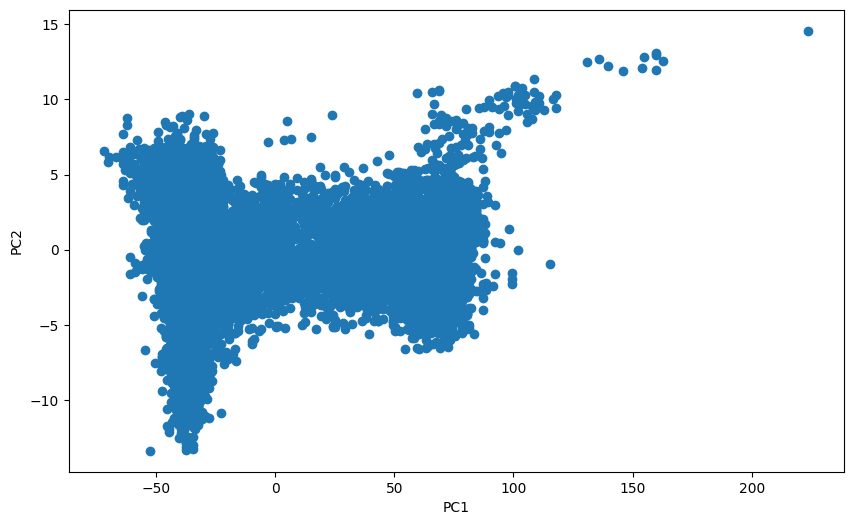

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(plotData[:,0],plotData[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')

In [10]:
scaled_df =pd.DataFrame(plotData,columns=df_w5.columns)
scaled_df.head(2)


,DPD,APD,MWD,WTMP,WVHT
0,-34.846205,-1.888302,0.849057,0.051732,-0.150008
1,-37.867290,-1.162442,0.889624,-0.059958,-0.088756


In [11]:
X=scaled_df.values

/Users/disha/anaconda3/envs/pyleo/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/disha/anaconda3/envs/pyleo/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/disha/anaconda3/envs/pyleo/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/disha/anaconda3/envs/pyleo/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The 

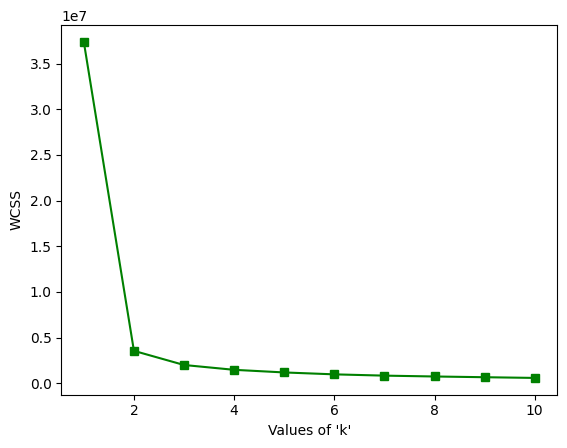

In [12]:
from sklearn.cluster import KMeans
#elbow method to determine number of clusters
wcss = {} 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X) 
    wcss[i] = kmeans.inertia_
     
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

In [13]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)

/Users/disha/anaconda3/envs/pyleo/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

How many clusters are the right choice, why?
- The right choice for the number of clusters is 2. Because the bend of the elbow plot is at 2.

In [14]:
kmeans.cluster_centers_

array([[-3.29170731e+01, -1.13006243e-02, -1.65074449e-02,
         1.56883295e-02, -1.48728599e-03],
       [ 5.94903618e+01,  2.04233903e-02,  2.98335721e-02,
        -2.83532012e-02,  2.68794195e-03]])

In [15]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [16]:
pca = PCA(n_components=2)
reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])
 
#Reduced Features
reduced_X.head()


,PCA1,PCA2
0,-34.846205,-1.888302
1,-37.867290,-1.162442
2,-33.843561,-1.648540
3,-33.911753,0.094715
4,-33.911136,0.024181


In [17]:
centers=pca.transform(kmeans.cluster_centers_)
 
# reduced centers
centers

array([[-3.29170731e+01, -1.13006243e-02],
       [ 5.94903618e+01,  2.04233903e-02]])

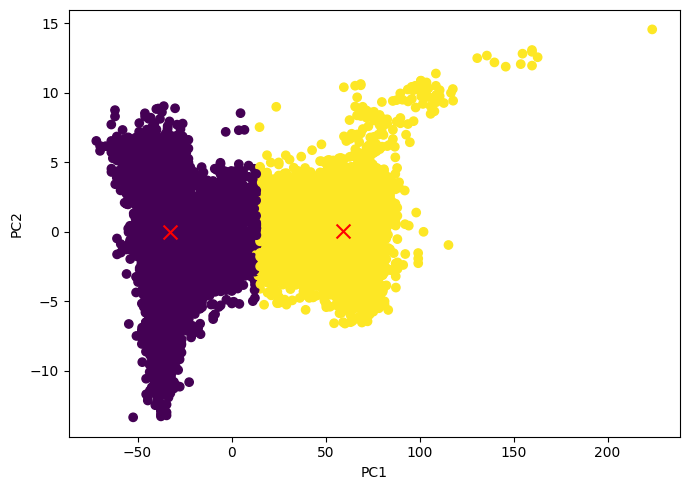

In [18]:
plt.figure(figsize=(7,5))
 
# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()

Does the clustering make sense with what you can see with your eyes?
- The clustering make sense as in it clusters into two separate groups.